In [ ]:
pip install pulp

In [ ]:
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files
data_falah = files.upload() 

Saving data buku novel fixxx jogja.csv to data buku novel fixxx jogja (2).csv


In [ ]:
data_falah

{'data buku novel fixxx jogja.csv': b'judul,harga,kota_toko,jarak_tempuh (km),terjual\r\nPetualangan Sherlock Holmes,170000,KAB. BANTUL,12,117\r\nMOTIVASI MUSLIMAH : THE GREAT SHALIHA,51000,KOTA DEPOK,550,193\r\n"MY HUSBAND MY CEO, PERFECT HUSBAND, LECTURER HUSBAND. 3 ",57000,KOTA JAKARTA BARAT,600,140\r\nPene000it Indoliterasi - Sherlock Holmes The Complete  Collection English Edition Box Set,170000,KAB. BANTUL,12,5\r\n My Lecturer My Husband - GITLICIOUS,16500,KAB. BEKASI,550,1800\r\n MOZACHIKO POPPI PERTIWI NEW COVER TRUSTED & ,69810,KOTA DEPOK,550,323\r\n LOVE ALERT by Seo Han Gyeol,135150,KAB. TANGERANG,650,164\r\n  : SELAMAT TINGGAL KARYA TERE LIYE,68000,KOTA JAKARTA BARAT,600,139\r\n Septihan - Poppi Pertiwi,79200,KOTA JAKARTA SELATAN,600,276\r\n LetMeTellYouAStory About Zodiac by ALEXANDER THIAN,84150,KAB. TANGERANG,650,2500\r\n Septihan - Poppi Pertiwi ,74250,KOTA DEPOK,550,633\r\n I WANT TO EAT YOUR PANCREAS ( New cover) by Sumino Yoru,71400,KAB. TANGERANG,650,814\r\n GISELLE

In [ ]:
import io
df_falah = pd.read_csv(io.StringIO(data_falah['data buku novel fixxx jogja.csv'].decode('utf-8')))
print(df_falah)

                                                judul  ...  terjual
0                         Petualangan Sherlock Holmes  ...      117
1               MOTIVASI MUSLIMAH : THE GREAT SHALIHA  ...      193
2   MY HUSBAND MY CEO, PERFECT HUSBAND, LECTURER H...  ...      140
3   Pene000it Indoliterasi - Sherlock Holmes The C...  ...        5
4                 My Lecturer My Husband - GITLICIOUS  ...     1800
..                                                ...  ...      ...
88                                     INDIGO Stories  ...      217
89                  WHAT TO SAY NEXT by Julie Buxbaum  ...       31
90                              IPA & IPS (chachaii_)  ...       56
91                                 Renata - Hytrrahmi  ...       97
92  Ready Stock  Selamat Tinggal Karya Tere Liye -...  ...       70

[93 rows x 5 columns]


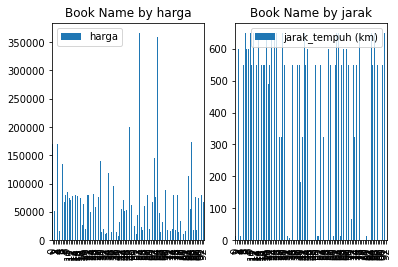

In [ ]:
fig, axs = plt.subplots(1,2)
my_plot = df_falah[['judul', 'harga']].plot(kind='bar', title="Book Name by harga", ax=axs[0])
my_plot = df_falah[['judul', 'jarak_tempuh (km)']].plot(kind='bar', title="Book Name by jarak", ax=axs[1])

**Setting Up LP Problem:**
- Menamakan objek program
- Membuat formulasi fungsi tujuannya

In [ ]:
# create the LP object, set up as a minimization problem --> since we want to maximize the number of books we read in a year
prob = pulp.LpProblem('novel_favorit',LpMinimize)

- Membuat variabel keputusan X

In [ ]:
# create decision variables
decision_variables = []
for rownum, row in df_falah.iterrows(): #perulangan membuat variabel keputusan
  variable = str('x' + str(rownum))
  variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') # membuat variabel menjadi biner
  decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with vdecision_variables:" + str(decision_variables))

Total number of decision_variables: 93
Array with vdecision_variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81, x82, x83, x84, x85, x86, x87, x88, x89, x90, x91, x92]


- Mendefinisikan fungsi tujuannya

In [ ]:
# define objective function (minimixing the cost of the trip)
total_harga = ""
for rownum, row in df_falah.iterrows(): #perulangan membuat fungsi tujuan
  for i, schedule in enumerate(decision_variables): 
    if rownum == i:
      formula = row['harga']*schedule
      total_harga += formula

prob += total_harga
print ("Optimization function: " + str(total_harga))

Optimization function: 170000*x0 + 51000*x1 + 74250*x10 + 71400*x11 + 77350*x12 + 77000*x13 + 79500*x14 + 77220*x15 + 39000*x16 + 74250*x17 + 26000*x18 + 62900*x19 + 57000*x2 + 20000*x20 + 79200*x21 + 79000*x22 + 50150*x23 + 75650*x24 + 82000*x25 + 58650*x26 + 78975*x27 + 76000*x28 + 139000*x29 + 170000*x3 + 15000*x30 + 20000*x31 + 10000*x32 + 12600*x33 + 118000*x34 + 99000*x35 + 15000*x36 + 96000*x37 + 81000*x38 + 14800*x39 + 16500*x4 + 6500*x40 + 32640*x41 + 55200*x42 + 71600*x43 + 52000*x44 + 54000*x45 + 63500*x46 + 200000*x47 + 62100*x48 + 15600*x49 + 69810*x5 + 25000*x50 + 10000*x51 + 45000*x52 + 366400*x53 + 22500*x54 + 17000*x55 + 60000*x56 + 19000*x57 + 79200*x58 + 20000*x59 + 135150*x6 + 5000*x60 + 68000*x61 + 145000*x62 + 76075*x63 + 360000*x64 + 48000*x65 + 15000*x66 + 31500*x67 + 141575*x68 + 89100*x69 + 68000*x7 + 17500*x70 + 20930*x71 + 15600*x72 + 20000*x73 + 79600*x74 + 18000*x75 + 79200*x76 + 15000*x77 + 33750*x78 + 21000*x79 + 79200*x8 + 10000*x80 + 16000*x81 + 105000

*  Mendefinisikan constrainnya/fungsi batasnnya

In [ ]:
# define constrains: (selected packages should not exceed total vacation days available)
aval_jarak = 2300
total_jarak = "" 
for rownum, row in df_falah.iterrows(): #perulangan membuat fungsi batasan
  for i, schedule in enumerate(decision_variables):
    if rownum == i:
      formula = row['jarak_tempuh (km)']*schedule
      total_jarak += formula

prob += (total_jarak == aval_jarak)
print ("Constrains: " + str(total_jarak))

Constrains: 12*x0 + 550*x1 + 550*x10 + 650*x11 + 650*x12 + 550*x13 + 650*x14 + 550*x15 + 550*x16 + 550*x17 + 550*x18 + 650*x19 + 600*x2 + 489*x20 + 550*x21 + 650*x22 + 110*x23 + 650*x24 + 650*x25 + 650*x26 + 324*x27 + 324*x28 + 650*x29 + 12*x3 + 550*x30 + x31 + 12*x32 + 5*x33 + x34 + 550*x35 + x36 + 650*x37 + 550*x38 + 550*x39 + 550*x4 + 181*x40 + 323*x41 + 650*x42 + 550*x43 + 600*x44 + 600*x45 + x46 + x47 + 553*x48 + 550*x49 + 550*x5 + 12*x50 + 12*x51 + 550*x52 + x53 + 324*x54 + x55 + 650*x56 + 600*x57 + 550*x58 + 324*x59 + 650*x6 + 12*x60 + 550*x61 + 650*x62 + 650*x63 + 12*x64 + 550*x65 + 600*x66 + 12*x67 + 600*x68 + 550*x69 + 600*x7 + 550*x70 + 65*x71 + 550*x72 + 324*x73 + 550*x74 + x75 + 650*x76 + x77 + 5*x78 + x79 + 600*x8 + 12*x80 + 550*x81 + x82 + 650*x83 + 550*x84 + 650*x85 + x86 + 550*x87 + x88 + 216*x89 + 650*x9 + 550*x90 + 650*x91 + 392*x92


*   Final formatnya

In [ ]:
# the final format
print (prob)
prob.writeLP("novel_favorit.lp" )

novel_favorit:
MINIMIZE
170000*x0 + 51000*x1 + 74250*x10 + 71400*x11 + 77350*x12 + 77000*x13 + 79500*x14 + 77220*x15 + 39000*x16 + 74250*x17 + 26000*x18 + 62900*x19 + 57000*x2 + 20000*x20 + 79200*x21 + 79000*x22 + 50150*x23 + 75650*x24 + 82000*x25 + 58650*x26 + 78975*x27 + 76000*x28 + 139000*x29 + 170000*x3 + 15000*x30 + 20000*x31 + 10000*x32 + 12600*x33 + 118000*x34 + 99000*x35 + 15000*x36 + 96000*x37 + 81000*x38 + 14800*x39 + 16500*x4 + 6500*x40 + 32640*x41 + 55200*x42 + 71600*x43 + 52000*x44 + 54000*x45 + 63500*x46 + 200000*x47 + 62100*x48 + 15600*x49 + 69810*x5 + 25000*x50 + 10000*x51 + 45000*x52 + 366400*x53 + 22500*x54 + 17000*x55 + 60000*x56 + 19000*x57 + 79200*x58 + 20000*x59 + 135150*x6 + 5000*x60 + 68000*x61 + 145000*x62 + 76075*x63 + 360000*x64 + 48000*x65 + 15000*x66 + 31500*x67 + 141575*x68 + 89100*x69 + 68000*x7 + 17500*x70 + 20930*x71 + 15600*x72 + 20000*x73 + 79600*x74 + 18000*x75 + 79200*x76 + 15000*x77 + 33750*x78 + 21000*x79 + 79200*x8 + 10000*x80 + 16000*x81 + 10500

[x0,
 x1,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x42,
 x43,
 x44,
 x45,
 x46,
 x47,
 x48,
 x49,
 x5,
 x50,
 x51,
 x52,
 x53,
 x54,
 x55,
 x56,
 x57,
 x58,
 x59,
 x6,
 x60,
 x61,
 x62,
 x63,
 x64,
 x65,
 x66,
 x67,
 x68,
 x69,
 x7,
 x70,
 x71,
 x72,
 x73,
 x74,
 x75,
 x76,
 x77,
 x78,
 x79,
 x8,
 x80,
 x81,
 x82,
 x83,
 x84,
 x85,
 x86,
 x87,
 x88,
 x89,
 x9,
 x90,
 x91,
 x92]

*   Actual Optimization

In [ ]:
# the actual optimization
optimization_result = prob.solve()

print("Status:", LpStatus[optimization_result])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables(): #perulangan
  print(v.name, "=", v.varValue) #v.name(ya/tidak) v.varValue(1/0)

Status: Optimal
Optimal Solution to the problem:  63800.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 0.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 1.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 0.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 1.0
x4 = 0.0
x40 = 0.0
x41 = 0.0
x42 = 0.0
x43 = 0.0
x44 = 0.0
x45 = 0.0
x46 = 0.0
x47 = 0.0
x48 = 0.0
x49 = 0.0
x5 = 0.0
x50 = 0.0
x51 = 0.0
x52 = 0.0
x53 = 0.0
x54 = 0.0
x55 = 0.0
x56 = 0.0
x57 = 1.0
x58 = 0.0
x59 = 0.0
x6 = 0.0
x60 = 0.0
x61 = 0.0
x62 = 0.0
x63 = 0.0
x64 = 0.0
x65 = 0.0
x66 = 1.0
x67 = 0.0
x68 = 0.0
x69 = 0.0
x7 = 0.0
x70 = 0.0
x71 = 0.0
x72 = 0.0
x73 = 0.0
x74 = 0.0
x75 = 0.0
x76 = 0.0
x77 = 0.0
x78 = 0.0
x79 = 0.0
x8 = 0.0
x80 = 0.0
x81 = 0.0
x82 = 0.0
x83 = 0.0
x84 = 0.0
x85 = 0.0
x86 = 0.0
x87 = 0.0
x88 = 0.0
x89 = 0.0
x9 = 0.0
x90 = 0.0
x91 = 0.0


*   Membuat tabel baru agar dapat mudah di interpretasiikan

In [ ]:
variable_name = []
variable_value = []

for v in prob.variables(): #perulangan megambungkan 
  variable_name.append(v.name)
  variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows(): #perulangan membuat data frame
  value = re.findall(r'(\d+)', row['variable'])
  df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable') #diurutkan

#append results (menggambungkan hasil)
for rownum, row in df_falah.iterrows():
  for results_rownum, results_row in df.iterrows():
    if rownum == results_row['variable']:
     df_falah.loc[rownum, 'decision'] = results_row['value']

df_falah

,judul,harga,kota_toko,jarak_tempuh (km),terjual,decision
0,Petualangan Sherlock Holmes,170000,KAB. BANTUL,12,117,0.0
1,MOTIVASI MUSLIMAH : THE GREAT SHALIHA,51000,KOTA DEPOK,550,193,0.0
2,"MY HUSBAND MY CEO, PERFECT HUSBAND, LECTURER H...",57000,KOTA JAKARTA BARAT,600,140,0.0
3,Pene000it Indoliterasi - Sherlock Holmes The C...,170000,KAB. BANTUL,12,5,0.0
4,My Lecturer My Husband - GITLICIOUS,16500,KAB. BEKASI,550,1800,0.0
...,...,...,...,...,...,...
88,INDIGO Stories,18000,KOTA YOGYAKARTA,1,217,0.0
89,WHAT TO SAY NEXT by Julie Buxbaum,74800,KAB. PONOROGO,216,31,0.0
90,IPA & IPS (chachaii_),71200,KOTA DEPOK,550,56,0.0
91,Renata - Hytrrahmi,79000,KOTA TANGERANG SELATAN,650,97,0.0


In [ ]:
# the final decisions and results of the optimization in the “user friendly way”
df_falah[df_falah['decision'] == 1]

,judul,harga,kota_toko,jarak_tempuh (km),terjual,decision
30,RIGEL - RIRIN CIPLUK,15000,KAB. BEKASI,550,52,1.0
39,- Kamu Terlalu Banyak Bercanda by Marcela,14800,KAB. BEKASI,550,1600,1.0
57,"WATTPAD SEPTIHAN, FRIENDSHIT, 24, ANTARIKSA, ...",19000,KOTA JAKARTA BARAT,600,362,1.0
66,KAMU TERLALU BANYAK BERCANDA,15000,KOTA JAKARTA BARAT,600,35,1.0


In [ ]:
df_falah[df_falah['decision'] == 1]['harga'].sum(axis=0)

63800